In [37]:
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import Chem, DataStructs, RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D, Generate
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd

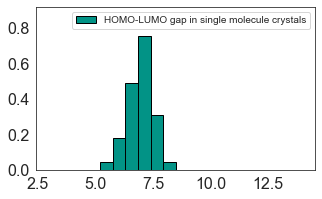

In [38]:
# troisi single molecule crystals with electronic properties

top40 = pd.read_csv('../data/troisi_top40.csv')#, encoding='latin1')
fig, ax = plt.subplots(1,figsize=(5,3))
ax.hist([round(float(i),2) for i in top40['LUMO-HOMO']], range=[3, 14], label='HOMO-LUMO gap in single molecule crystals',density=True, color='#029386' ,bins=20,ec='k')
plt.ylim(0,0.92)
plt.legend()
#plt.savefig('troisi_top40.png', dpi=600,bbox_inches='tight')

In [16]:
# homo-lumo dict 
cocrystals = pd.read_csv('../data/csd_cocrystals2020.csv', encoding='latin')
homo_lumo_dict = pd.read_csv('../data/homo_lumo_dict.csv')
my_dict = dict(zip(homo_lumo_dict.smiles.values, homo_lumo_dict.iloc[:, 3:].values))

In [17]:
holu1 = pd.DataFrame([my_dict[i] for i in cocrystals.smiles1], columns=['homo1', 'lumo1'])
holu2 = pd.DataFrame([my_dict[i] for i in cocrystals.smiles2], columns=['homo2', 'lumo2'])
holu1 = holu1.loc[holu1[holu1.homo1!=0].index]
holu2 = holu2.loc[holu2[holu2.homo2!=0].index]

In [56]:
df =pd.concat([pd.DataFrame(holu1.lumo1 - holu2.homo2, columns=['A']), pd.DataFrame(holu2.lumo2 - holu1.homo1, columns=['B'])], axis=1)
df1 = pd.concat([cocrystals.group, pd.DataFrame(df[["A", "B"]].min(axis=1), columns=['holu']) ], axis=1)

C:\Users\kvriz\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kvriz\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kvriz\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

<AxesSubplot:xlabel='holu', ylabel='Density'>

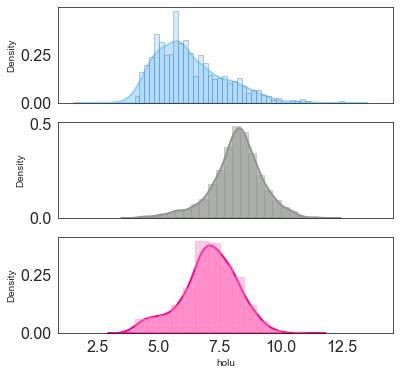

In [57]:
import seaborn as sns
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(3,sharex=True, figsize=(6,6))
sns.set_style(style='white')
import matplotlib 
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

plt.rcParams["font.weight"] = "light"
plt.rcParams["axes.labelweight"] = "normal"
plt.rcParams['font.family'] = 'sans-serif'
ax.set(adjustable='box')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(axis = 'both', which='both', width=3)
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis = 'both', which='major', length=8)
#ax.tick_params(axis = 'both', which='minor', length=8, color='black')
ax.tick_params(axis = 'both', which='both' , bottom=True, top=True, left=True, right=True, direction='in')
ax.axis('on')
ax.grid(False)
ax.set_facecolor('xkcd:white')



b=sns.distplot(df1.holu[df1.group==1], hist=True, kde=True, ax=ax1,#hist_kws={'range': (4, 14)},
             bins=50, color = '#95d0fc', 
             hist_kws={'edgecolor':'#5a7d9a','range': (4, 14)},
             kde_kws={'linewidth': 2,"alpha": 0.6,"shade": True,"color":'#95d0fc'},label='Known co-crystals')

sns.distplot(df1.holu[df1.group==2], hist=True, kde=True, ax=ax2,
             bins=30, color = '#929591', 
             hist_kws={'edgecolor':'#929591','range': (4, 14)},
             kde_kws={'linewidth': 2,"alpha": 0.6,"shade": True},label='Predicted as negatives')

sns.distplot(df1.holu[df1.group==3], hist=True, kde=True, ax=ax3,
             bins=20, color = '#ff81c0', 
             hist_kws={'edgecolor':'#ff81c0','range': (4, 14)},
             kde_kws={'linewidth': 2,"alpha": 0.4,"shade": True, "color":'#ff028d'},label='Predicted as positives')
#

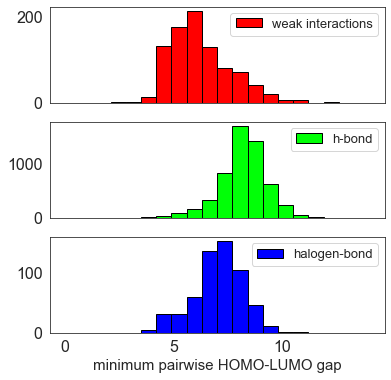

In [59]:
from matplotlib.pyplot import figure
#plt.subplots(3)
#fig = plt.figure(figsize=(6,4))
fig, (ax1, ax2, ax3) = plt.subplots(3,sharex=True, figsize=(6,6))
#ax = fig.add_subplot(111)
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax1.hist(df1.holu[df1.group==1], range=[0, 14], label='weak interactions', color='red' ,bins=20,ec='k')
ax2.hist(df1.holu[df1.group==2],range=[0, 14], label='h-bond', color='#01ff07' ,bins=20,ec='k')
ax3.hist(df1.holu[df1.group==3],range=[0, 14], label='halogen-bond', color='blue' ,bins=20,ec='k')
ax1.legend(fontsize=13)
ax2.legend(fontsize=13)
ax3.legend(fontsize=13)
ax3.set_xlabel('minimum pairwise HOMO-LUMO gap', fontsize=15)
plt.savefig('homo-lumo.png', dpi=600, bbox_inches='tight')